# Logistic Regression
## Setup

In [196]:
# import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time

# load datasets
fifa = np.load('./datasets/fifa.npz')
finance = np.load('./datasets/finance.npz')
orbits = np.load('./datasets/orbits.npz')

## Refactored Functions
Codes for common procedures are refactored into functions below for simplicity.

In [197]:
# Train, Test and Evaluate Model
def run_logistic_regression(dataset, learning_rate=1e-3, verbose=True):
    # load data
    X_train = dataset['train_X']
    Y_train = dataset['classification_train_Y']
    X_test = dataset['test_X']
    Y_test = dataset['classification_test_Y']
    
    # start timer
    start_time = time.time()
    
    # define and train model
    model = SGDClassifier(
        loss='log', # logistic regression
        learning_rate='constant',
        eta0=learning_rate,
        early_stopping=True,
        tol=1e-3, # stop if validation improvement < 1e-3
    )
    model.fit(X_train, Y_train)
    
    # predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    if verbose:
        # stop timer
        print('Time elapsed for training and predictions: %.3f seconds' % (time.time() - start_time))
        print('\n')
    
        # evaluate training result
        print('Training set accuracy: %.3f' % accuracy_score(Y_train, Y_train_pred))
        conmat_train = confusion_matrix(Y_train, Y_train_pred)
        plt.title('Training Set: Confusion Matrix')
        sns.heatmap(conmat_train, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
    
        # evaluate testing result
        print('Testing set accuracy: %.3f' % accuracy_score(Y_test, Y_test_pred))
        conmat_test = confusion_matrix(Y_test, Y_test_pred)
        plt.title('Testing Set: Confusion Matrix')
        sns.heatmap(conmat_test, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
    
    # return testing accuracy
    return accuracy_score(Y_test, Y_test_pred)

# Scan for finding best learning rate
def best_learning_rate_scan(dataset, candidates):
    best_acc = 0
    best_lr = 0
    for lr in candidates:
        acc = run_logistic_regression(dataset, learning_rate=lr, verbose=False)
        print('>> Trying learning rate: ', lr, ', accuracy: ', acc)
        if acc > best_acc:
            best_acc = acc
            best_lr = lr
    print('Best learning rate found: ', best_lr, 'accuracy: ', best_acc)
    return best_lr

## FIFA Dataset

>> Trying learning rate:  0.1 , accuracy:  0.8362519899931772
>> Trying learning rate:  0.5 , accuracy:  0.7821241755742552
>> Trying learning rate:  0.01 , accuracy:  0.8448942460768706
>> Trying learning rate:  0.05 , accuracy:  0.8433022515351376
>> Trying learning rate:  0.001 , accuracy:  0.8125994996588584
>> Trying learning rate:  0.005 , accuracy:  0.8373891289515579
>> Trying learning rate:  0.0001 , accuracy:  0.7448260177393677
>> Trying learning rate:  0.0005 , accuracy:  0.7896292926995679
Best learning rate found:  0.01 accuracy:  0.8448942460768706


Time elapsed for training and predictions: 0.039 seconds


Training set accuracy: 0.853


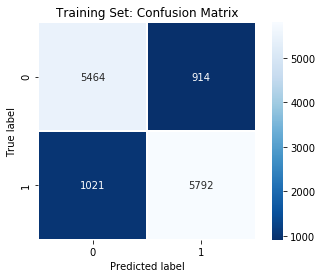

Testing set accuracy: 0.850


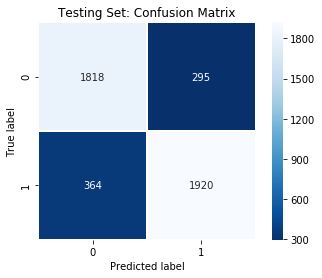

In [199]:
fifa_best_lr = best_learning_rate_scan(fifa, [1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4])
print('\n')
_ = run_logistic_regression(fifa, learning_rate=fifa_best_lr, verbose=True)

## Finance Dataset

>> Trying learning rate:  0.1 , accuracy:  0.7886710239651417
>> Trying learning rate:  0.5 , accuracy:  0.7276688453159041
>> Trying learning rate:  0.01 , accuracy:  0.7570806100217865
>> Trying learning rate:  0.05 , accuracy:  0.7854030501089324
>> Trying learning rate:  0.001 , accuracy:  0.7058823529411765
>> Trying learning rate:  0.005 , accuracy:  0.7407407407407407
>> Trying learning rate:  0.0001 , accuracy:  0.681917211328976
>> Trying learning rate:  0.0005 , accuracy:  0.7037037037037037
Best learning rate found:  0.1 accuracy:  0.7886710239651417


Time elapsed for training and predictions: 0.013 seconds


Training set accuracy: 0.821


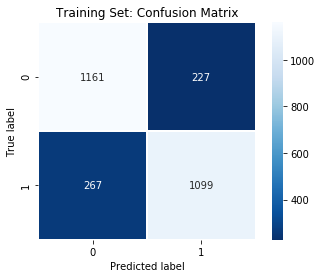

Testing set accuracy: 0.801


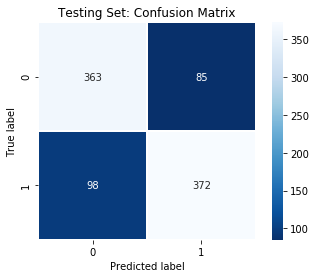

In [202]:
finance_best_lr = best_learning_rate_scan(finance, [1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4])
print('\n')
_ = run_logistic_regression(finance, learning_rate=finance_best_lr, verbose=True)

## Orbits Dataset

>> Trying learning rate:  0.1 , accuracy:  0.9561430793157076
>> Trying learning rate:  0.5 , accuracy:  0.8643856920684292
>> Trying learning rate:  0.01 , accuracy:  0.9088646967340591
>> Trying learning rate:  0.05 , accuracy:  0.9483670295489891
>> Trying learning rate:  0.001 , accuracy:  0.8662519440124417
>> Trying learning rate:  0.005 , accuracy:  0.8939346811819595
>> Trying learning rate:  0.0001 , accuracy:  0.6382581648522551
>> Trying learning rate:  0.0005 , accuracy:  0.857542768273717
Best learning rate found:  0.1 accuracy:  0.9561430793157076


Time elapsed for training and predictions: 0.019 seconds


Training set accuracy: 0.960


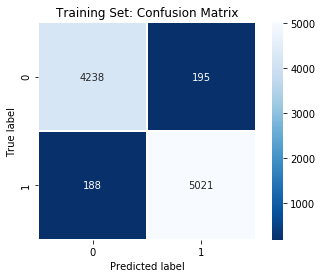

Testing set accuracy: 0.961


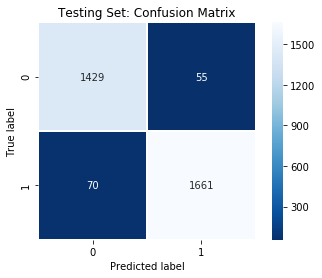

In [203]:
orbits_best_lr = best_learning_rate_scan(orbits, [1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4])
print('\n')
_ = run_logistic_regression(orbits, learning_rate=orbits_best_lr, verbose=True)